# [dev] 1. Sample Weight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import utm
import glob
from IPython.display import clear_output

In [2]:
LOG_DIR = "../log/"
DATA_DIR = "../dataset/train/"

## Load Training Dataset

In [3]:
def load_dataset():
    csvfiles = glob.glob(DATA_DIR + "/*.csv")
    csvfiles = [csvfile[-21:] for csvfile in csvfiles]

    dfs = []
    for idx, csvfile in enumerate(csvfiles):
        path = f"{DATA_DIR}/{csvfile}"
        dfs.append(pd.read_csv(path))
        clear_output(wait=True)
        print(f'Progress: {(idx+1) / len(csvfiles) * 100.0:.2f}% | {csvfile[:-4].replace("-",":")}')
    return pd.concat(dfs)
df = load_dataset()

Progress: 100.00% | 20:20:00:00:04:49


## Visualize RSS Distribution

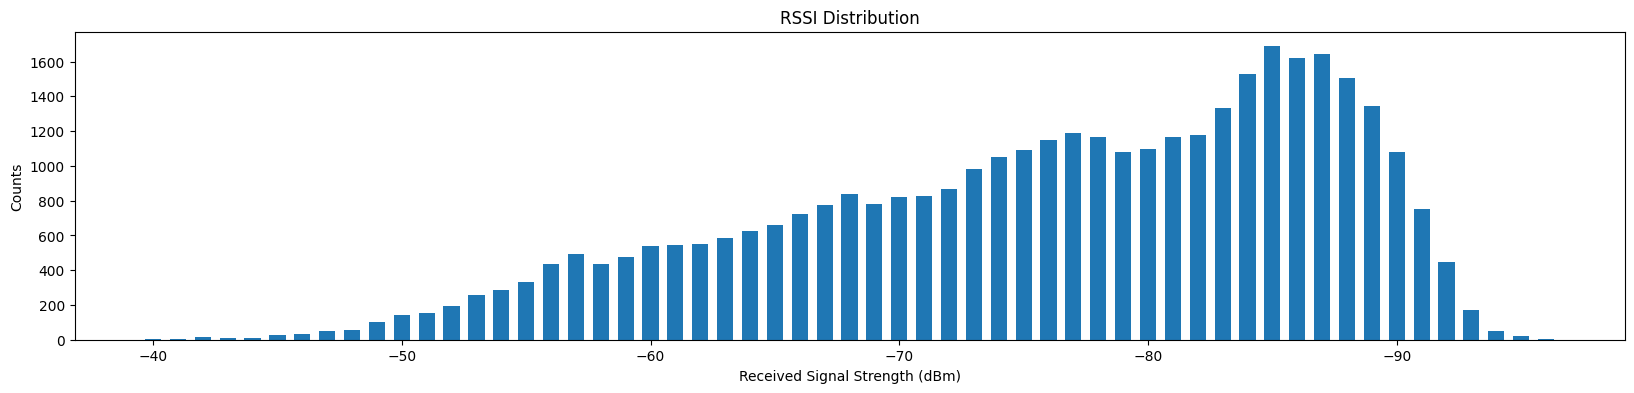

In [4]:
def plot_distribution(df, column='RSS', title="", xlabel="", inv_xaxis=False, figsize=(20,4)):
    plt.figure(figsize=figsize)
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, width=0.65)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Counts")
    if inv_xaxis:
        plt.gca().invert_xaxis()
    plt.show()
plot_distribution(df, title="RSSI Distribution",column='RSS', xlabel="Received Signal Strength (dBm)", inv_xaxis=True)

45 0.9924832359939433


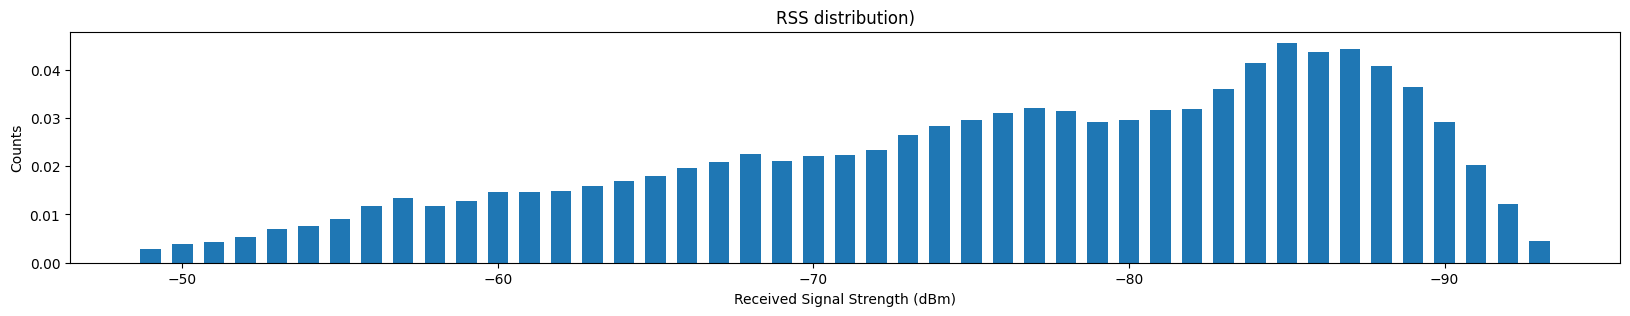

In [5]:
rss_pct = df.RSS.value_counts() / len(df)

idx99 = 0
for idx99 in range(0, len(rss_pct)):
    total = np.sum(rss_pct[:idx99])
    if total > 0.99:
        print(idx99, total)
        break
        
rss_pct = rss_pct[:idx99]
plt.figure(figsize=(20,3))
plt.bar(rss_pct.index, rss_pct.values, width=0.65)
plt.title(f"RSS distribution)")
plt.xlabel("Received Signal Strength (dBm)")
plt.ylabel("Counts")
plt.gca().invert_xaxis()
plt.show()

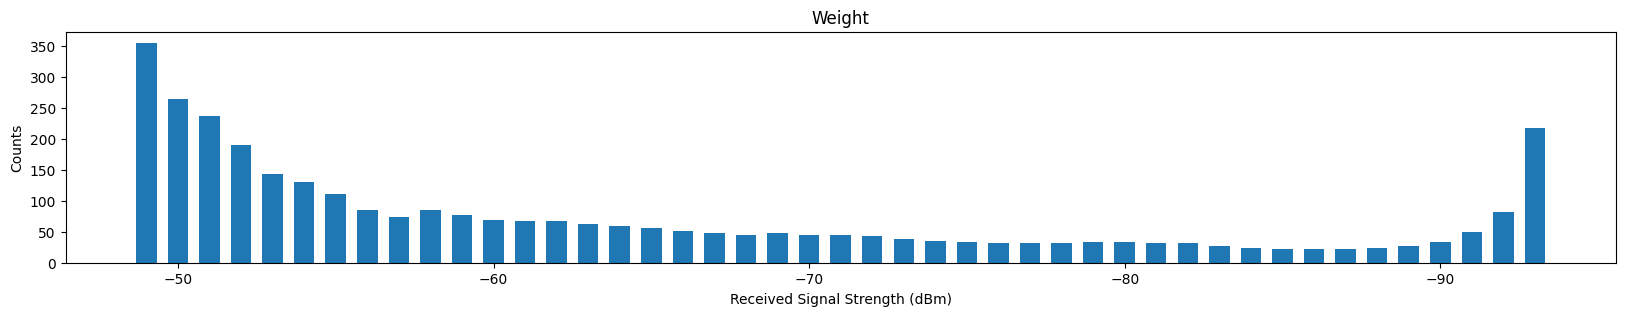

In [6]:
sample_weight = 1.0 / rss_pct
plt.figure(figsize=(20,3))
plt.bar(sample_weight.index, sample_weight.values, width=0.65)
plt.title(f"Weight")
plt.xlabel("Received Signal Strength (dBm)")
plt.ylabel("Counts")
plt.gca().invert_xaxis()
plt.show()

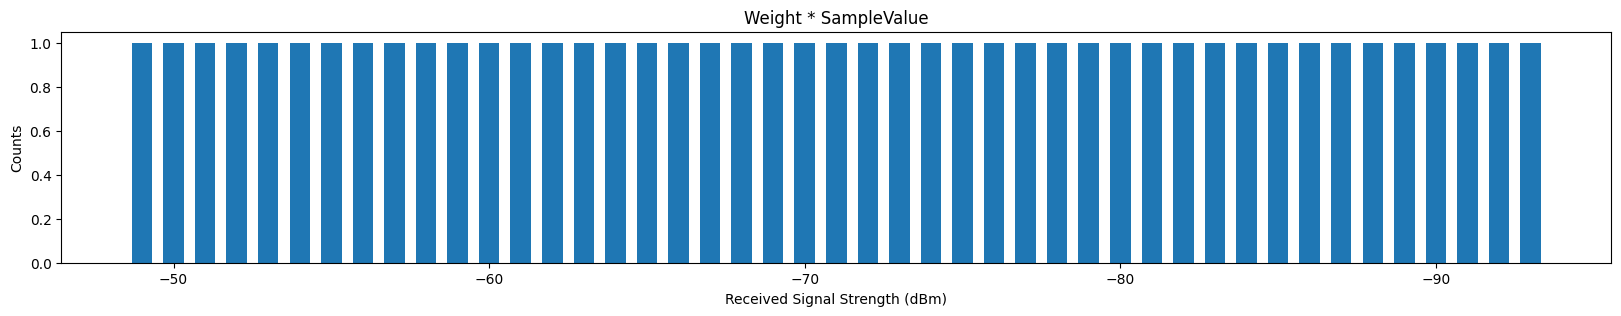

In [7]:
plt.figure(figsize=(20,3))
plt.bar(sample_weight.index, rss_pct.values * sample_weight.values, width=0.65)
plt.title(f"Weight * SampleValue")
plt.xlabel("Received Signal Strength (dBm)")
plt.ylabel("Counts")
plt.gca().invert_xaxis()
plt.show()